# Análisis exploratorio de los datos

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('datos_sensor_final2.csv')

# Preparar fecha y hora
df['fecha_hora'] = pd.to_datetime(df['fecha'] + ' ' + df['hora'], format='%d/%m/%Y %H:%M') #crear parametros

# Crear características temporales
df['hora_del_dia'] = df['fecha_hora'].dt.hour
df['minuto'] = df['fecha_hora'].dt.minute
df['timestamp'] = df['fecha_hora'].astype(np.int64) // 10**9

print("Primeras filas del dataset preparado:")
print(df.tail(1000))

Primeras filas del dataset preparado:
       aqi  pm1_ug_m3  pm2_5_ug_m3  pm10_ug_m3  temperatura_c  \
23656  122         34           51          64             16   
23657  118         33           49          60             16   
23658  114         32           47          58             16   
23659  110         31           45          55             16   
23660  102         28           41          50             16   
...    ...        ...          ...         ...            ...   
24651   10          3            3           4             19   
24652    9          2            3           4             19   
24653    8          2            2           3             19   
24654    8          2            2           3             19   
24655    9          2            3           3             18   

       humedad_porcentaje  punto_rocio_c  bulbo_humedo_c  indice_calor_c  \
23656                  82             13              14              16   
23657                  83    

In [5]:
# Fechas mínima y máxima
fecha_min = df['fecha_hora'].min()
fecha_max = df['fecha_hora'].max()

print("FECHAS LÍMITE:")
print(f"   MÁS ANTIGUA: {fecha_min.strftime('%A %d de %B de %Y a las %H:%M')}")
print(f"   MÁS RECIENTE: {fecha_max.strftime('%A %d de %B de %Y a las %H:%M')}")

# Fechas únicas
fechas_unicas = sorted(df['fecha_hora'].dt.date.unique())
print(f"\n FECHAS ÚNICAS ({len(fechas_unicas)} en total):")
for fecha in fechas_unicas:
    count = len(df[df['fecha_hora'].dt.date == fecha])
    print(f"   • {fecha.strftime('%d/%m/%Y')} - {count} registros")

print(f"\nRESUMEN:")
print(f"  Rango temporal: {(fecha_max - fecha_min).days} días")
print(f"   Total registros: {len(df)}")
print(f"  Promedio por día: {len(df)/len(fechas_unicas):.1f} registros/día")

FECHAS LÍMITE:
   MÁS ANTIGUA: Thursday 05 de December de 2024 a las 17:30
   MÁS RECIENTE: Wednesday 15 de October de 2025 a las 17:55

 FECHAS ÚNICAS (224 en total):
   • 05/12/2024 - 26 registros
   • 06/12/2024 - 96 registros
   • 07/12/2024 - 96 registros
   • 08/12/2024 - 96 registros
   • 09/12/2024 - 96 registros
   • 10/12/2024 - 96 registros
   • 12/12/2024 - 192 registros
   • 13/12/2024 - 96 registros
   • 14/12/2024 - 96 registros
   • 15/12/2024 - 96 registros
   • 16/12/2024 - 96 registros
   • 17/12/2024 - 96 registros
   • 18/12/2024 - 96 registros
   • 19/12/2024 - 96 registros
   • 20/12/2024 - 96 registros
   • 21/12/2024 - 96 registros
   • 22/12/2024 - 96 registros
   • 23/12/2024 - 96 registros
   • 24/12/2024 - 96 registros
   • 25/12/2024 - 96 registros
   • 26/12/2024 - 96 registros
   • 27/12/2024 - 96 registros
   • 28/12/2024 - 96 registros
   • 29/12/2024 - 96 registros
   • 30/12/2024 - 96 registros
   • 31/12/2024 - 96 registros
   • 01/01/2025 - 96 regi

Para usar los valores de fecha y hora a un número entero legible, uasmos el tiempo Epoch, que es la hora actual medida en número de segundos desde el Epoch Unix. 

[Epochconverter](https://www.epochconverter.com/seconds-days-since-y0)


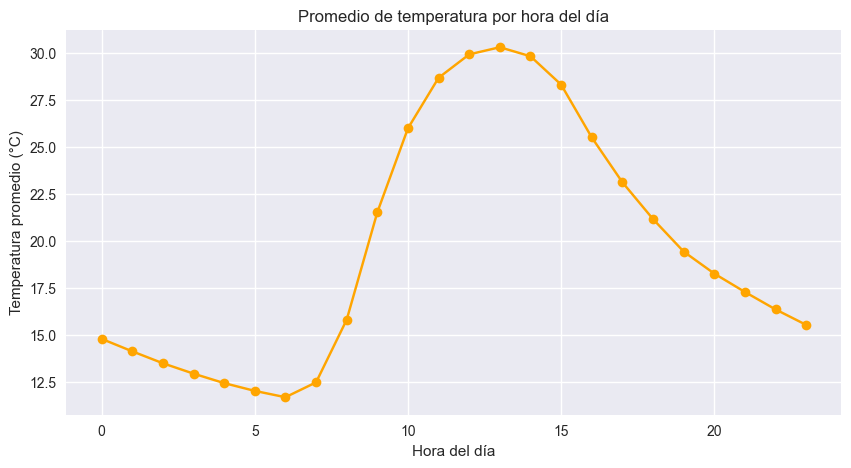

In [6]:
# Crear columna de hora
df['hora_del_dia'] = df['fecha_hora'].dt.hour

# Calcular promedio por hora
promedio_por_hora = df.groupby('hora_del_dia')['temperatura_c'].mean()

# Graficar
plt.figure(figsize=(10,5))
plt.plot(promedio_por_hora.index, promedio_por_hora.values, marker='o', color='orange')
plt.title("Promedio de temperatura por hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Temperatura promedio (°C)")
plt.grid(True)
plt.show()



\begin{array}{|c|c|c|l|}
\hline
\textbf{Evento} & \textbf{Hora Aproximada} & \textbf{Temp. Aprox.} (\mathbf{^\circ C}) & \textbf{Observación} \\
\hline
\text{Mínima} & \mathbf{6} & \mathbf{12.25} & \text{La hora más fría del día, generalmente poco después del amanecer.} \\
\hline
\text{Pico} & \mathbf{14} & \mathbf{30.0} & \text{La hora más cálida, que suele ocurrir un par de horas después del mediodía solar debido al retraso térmico.} \\
\hline
\text{Mediodía} & \mathbf{12} & \mathbf{28.75} & \text{Una temperatura muy alta, cerca del pico.} \\
\hline
\text{Medianoche} & \mathbf{24} & \mathbf{15.5} & \text{La temperatura a la medianoche.} \\
\hline
\end{array}

In [7]:
# Estadísticas descriptivas generales
print("Estadísticas descriptivas:")
print(df.describe())

# Información sobre tipos de datos y valores nulos
print("\nInformación del dataset:")
print(df.info())

Estadísticas descriptivas:
                aqi     pm1_ug_m3   pm2_5_ug_m3    pm10_ug_m3  temperatura_c  \
count  24656.000000  24656.000000  24656.000000  24656.000000   24656.000000   
mean      79.219257     21.859791     31.036827     37.038733      19.604113   
min        0.000000      0.000000      0.000000      0.000000       3.000000   
25%       58.000000     14.000000     19.000000     21.000000      14.000000   
50%       84.000000     22.000000     32.000000     37.000000      18.000000   
75%      104.000000     29.000000     42.000000     52.000000      25.000000   
max      315.000000    135.000000    236.000000    296.000000      38.000000   
std       35.675133     11.193039     16.860575     20.900954       7.360577   

       humedad_porcentaje  punto_rocio_c  bulbo_humedo_c  indice_calor_c  \
count        24656.000000   24656.000000    24656.000000    24656.000000   
mean            53.900349       7.948248       11.032406       18.868673   
min              4.00000

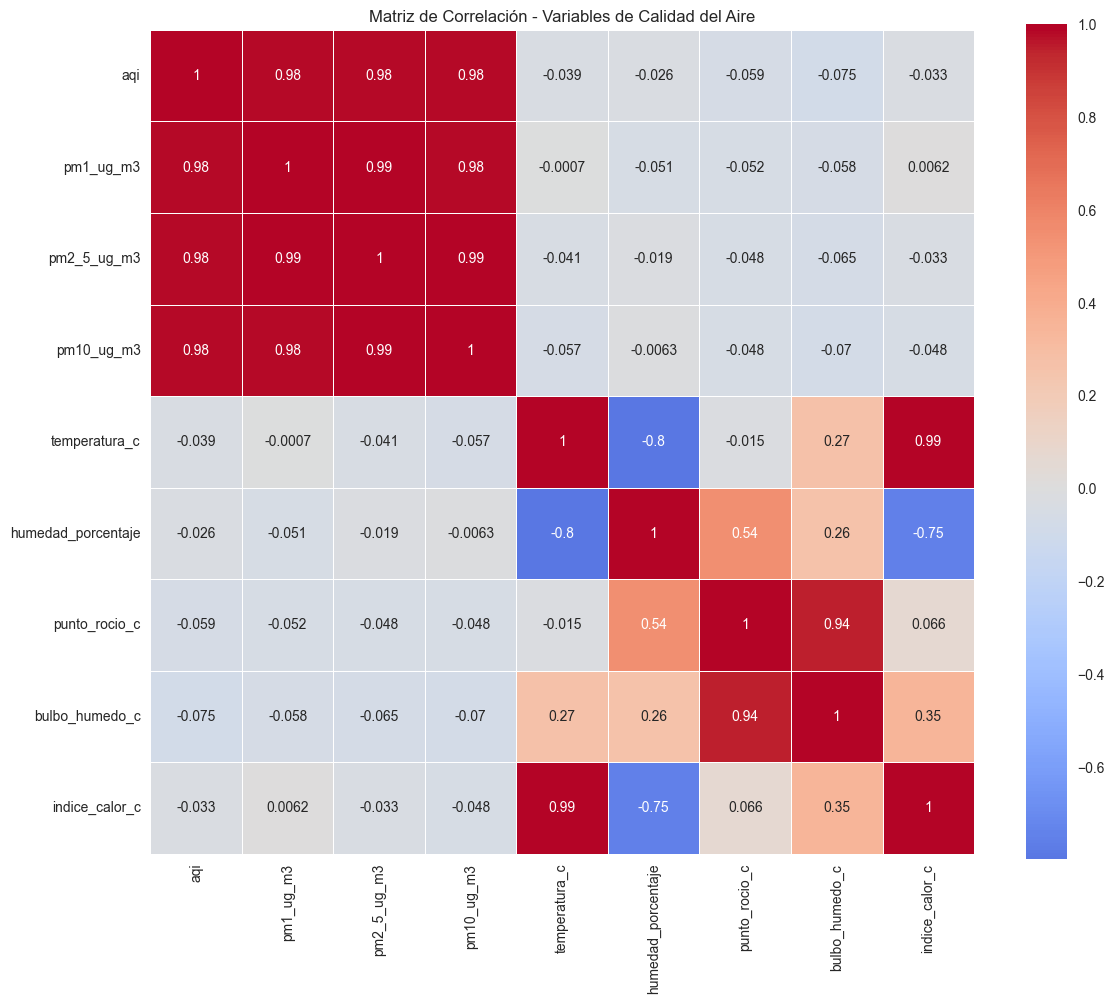


Correlaciones con AQI (ordenadas por magnitud):
aqi                   1.000000
pm2_5_ug_m3           0.983292
pm1_ug_m3             0.983224
pm10_ug_m3            0.980644
bulbo_humedo_c       -0.075348
punto_rocio_c        -0.058816
temperatura_c        -0.039025
indice_calor_c       -0.032868
humedad_porcentaje   -0.026360
Name: aqi, dtype: float64


In [8]:
# Calcular matriz de correlación
columnas_numericas = ['aqi', 'pm1_ug_m3', 'pm2_5_ug_m3', 'pm10_ug_m3', 
                     'temperatura_c', 'humedad_porcentaje', 'punto_rocio_c', 
                     'bulbo_humedo_c', 'indice_calor_c']

correlation_matrix = df[columnas_numericas].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Matriz de Correlación - Variables de Calidad del Aire')
plt.tight_layout()
plt.show()

# Correlaciones más fuertes con AQI
print("\nCorrelaciones con AQI (ordenadas por magnitud):")
aqi_correlations = correlation_matrix['aqi'].sort_values(key=abs, ascending=False)
print(aqi_correlations)

El Índice de Calidad del Aire (aqi) se calcula a menudo directamente basándose en los niveles de contaminantes como $\text{PM}_{2.5}$ o $\text{PM}_{10}$. Además, los niveles de $\text{PM}_1$, $\text{PM}_{2.5}$ y $\text{PM}_{10}$ suelen aumentar y disminuir simultáneamente, ya que provienen de fuentes similares y representan partículas de diferente tamaño.

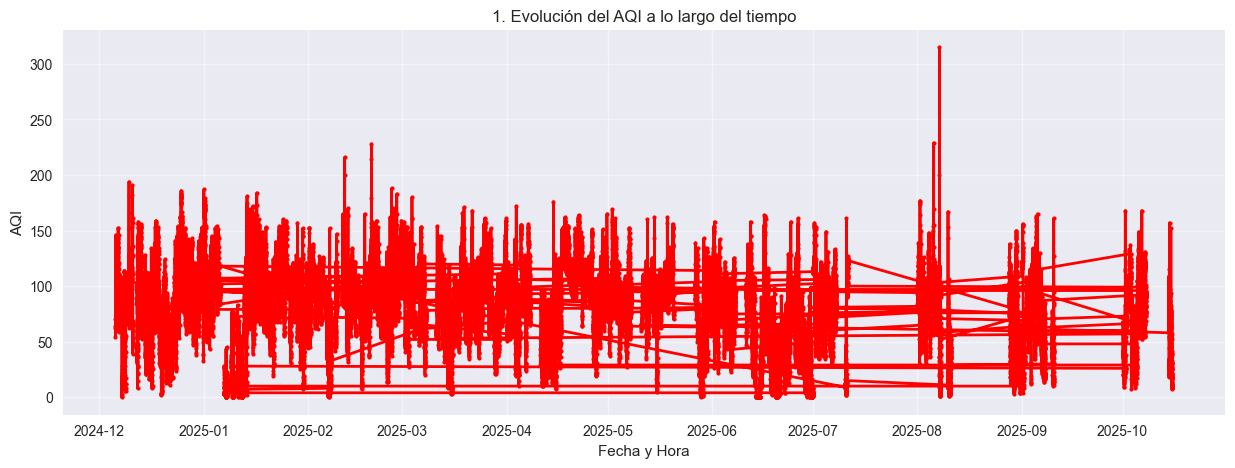

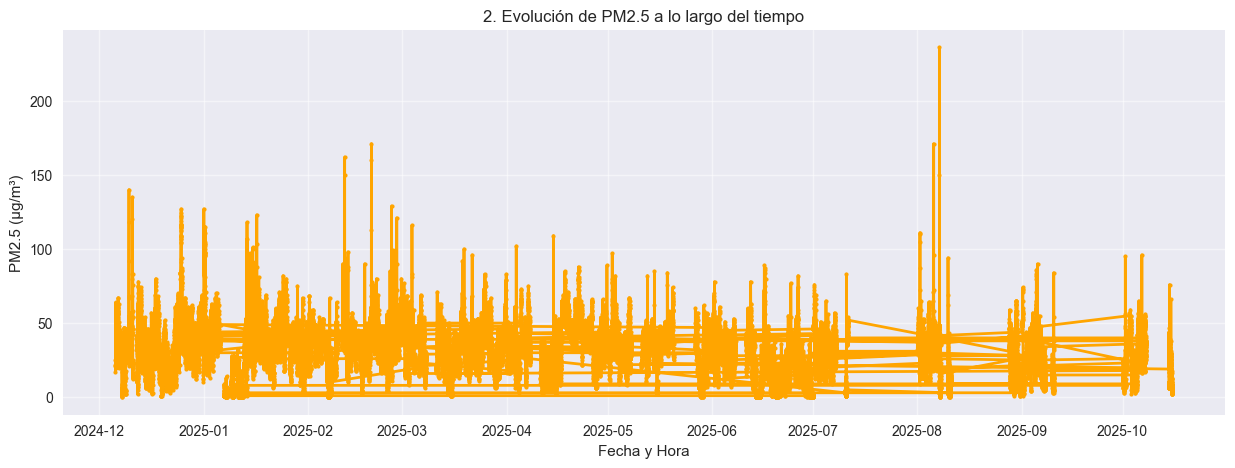

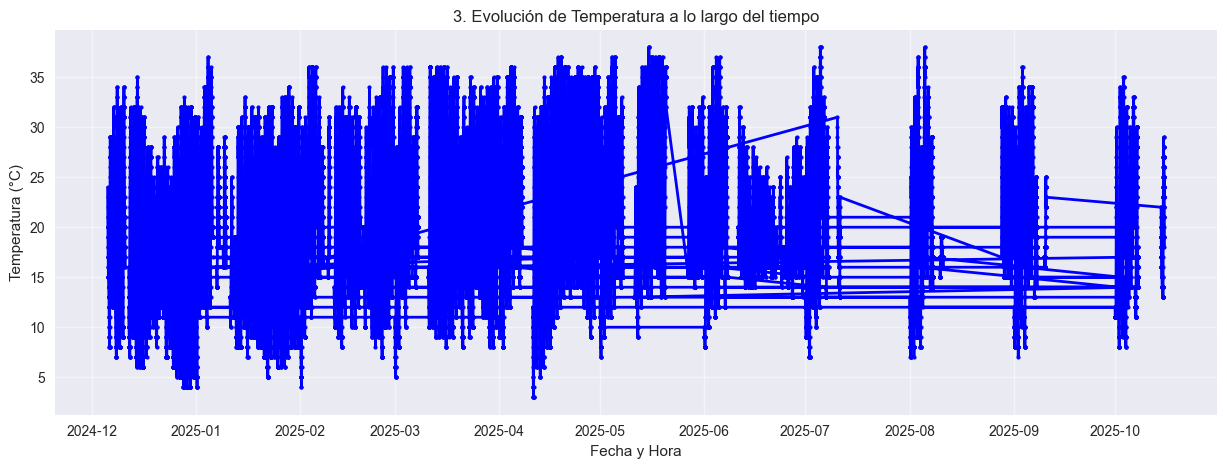

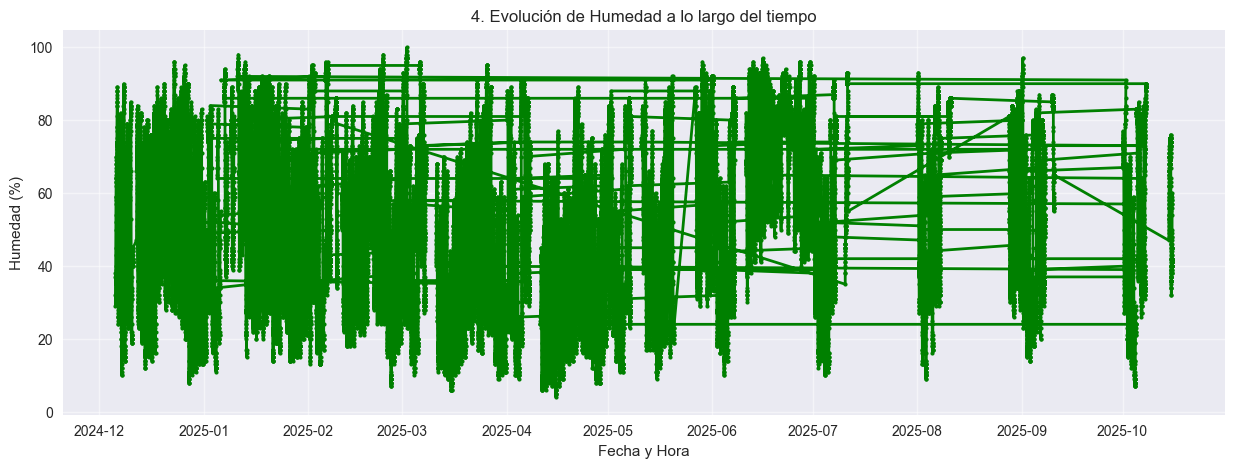

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
# Asumiendo que 'df' es el DataFrame cargado y limpio.

# --- 1. Evolución del AQI ---
plt.figure(figsize=(15, 5)) # Aumento de ancho
plt.plot(df['fecha_hora'], df['aqi'], marker='o', color='red', linewidth=2, markersize=3)
plt.title('1. Evolución del AQI a lo largo del tiempo')
plt.xlabel('Fecha y Hora')
plt.ylabel('AQI')
plt.grid(True, alpha=0.5)
plt.show()

# --- 2. Evolución de PM2.5 ---
plt.figure(figsize=(15, 5)) # Aumento de ancho
plt.plot(df['fecha_hora'], df['pm2_5_ug_m3'], marker='o', color='orange', linewidth=2, markersize=3)
plt.title('2. Evolución de PM2.5 a lo largo del tiempo')
plt.xlabel('Fecha y Hora')
plt.ylabel('PM2.5 (μg/m³)')
plt.grid(True, alpha=0.5)
plt.show()

# --- 3. Evolución de Temperatura ---
plt.figure(figsize=(15, 5)) # Aumento de ancho
plt.plot(df['fecha_hora'], df['temperatura_c'], marker='o', color='blue', linewidth=2, markersize=3)
plt.title('3. Evolución de Temperatura a lo largo del tiempo')
plt.xlabel('Fecha y Hora')
plt.ylabel('Temperatura (°C)')
plt.grid(True, alpha=0.5)
plt.show()

# --- 4. Evolución de Humedad ---
plt.figure(figsize=(15, 5)) # Aumento de ancho
plt.plot(df['fecha_hora'], df['humedad_porcentaje'], marker='o', color='green', linewidth=2, markersize=3)
plt.title('4. Evolución de Humedad a lo largo del tiempo')
plt.xlabel('Fecha y Hora')
plt.ylabel('Humedad (%)')
plt.grid(True, alpha=0.5)
plt.show()

Análisis de la  Calidad del Aire ($\mathbf{AQI}$  y $\mathbf{PM}_{2.5}$)

$\mathbf{AQI}$ está fuertemente impulsado por los niveles de $\mathbf{PM}_{2.5}$

Periodo Inicial (May. 2024 - Nov. 2024): Los datos son esporádicos. Los niveles base de $\text{AQI}$ se sitúan alrededor de $\mathbf{50}$ a $\mathbf{80}$. Hay picos ocasionales que alcanzan $\mathbf{150}$ a $\mathbf{200}$.

Hay dos picos de contaminación notablemente altos: uno a principios de $\mathbf{2025}$ y otro más extremo alrededor de $\mathbf{Julio/Agosto\ de\ 2025}$, donde el $\mathbf{AQI}$ supera los $\mathbf{300}$. Un $\text{AQI}$ por encima de $\mathbf{200}$ se considera muy insalubre. Estos picos sugieren eventos de contaminación agudos (ej. incendios, inversión térmica, o una fuente de emisión intensa).

Variables Meteorológicas (Temperatura y Humedad)

Muestra un rango de temperaturas más bajas a principios de 2025 (Invierno/Primavera), con mínimos que descienden a 5°C y máximos diurnos de 15°C a 20°C.

 A partir de Mayo/Junio de 2025, la temperatura se dispara, con máximos diurnos alcanzando o superando consistentemente los 35°C, lo que indica el periodo más cálido del conjunto de datos.

 Valores Altos en Periodos Fríos: La Humedad se mantiene en valores consistentemente altos entre 60% y 100% durante los meses más fríos y húmedos de 2025.

 La humedad muestra grandes oscilaciones diarias, cayendo ocasionalmente a mínimos cercanos al 0% (aire muy seco) y subiendo a 100%.

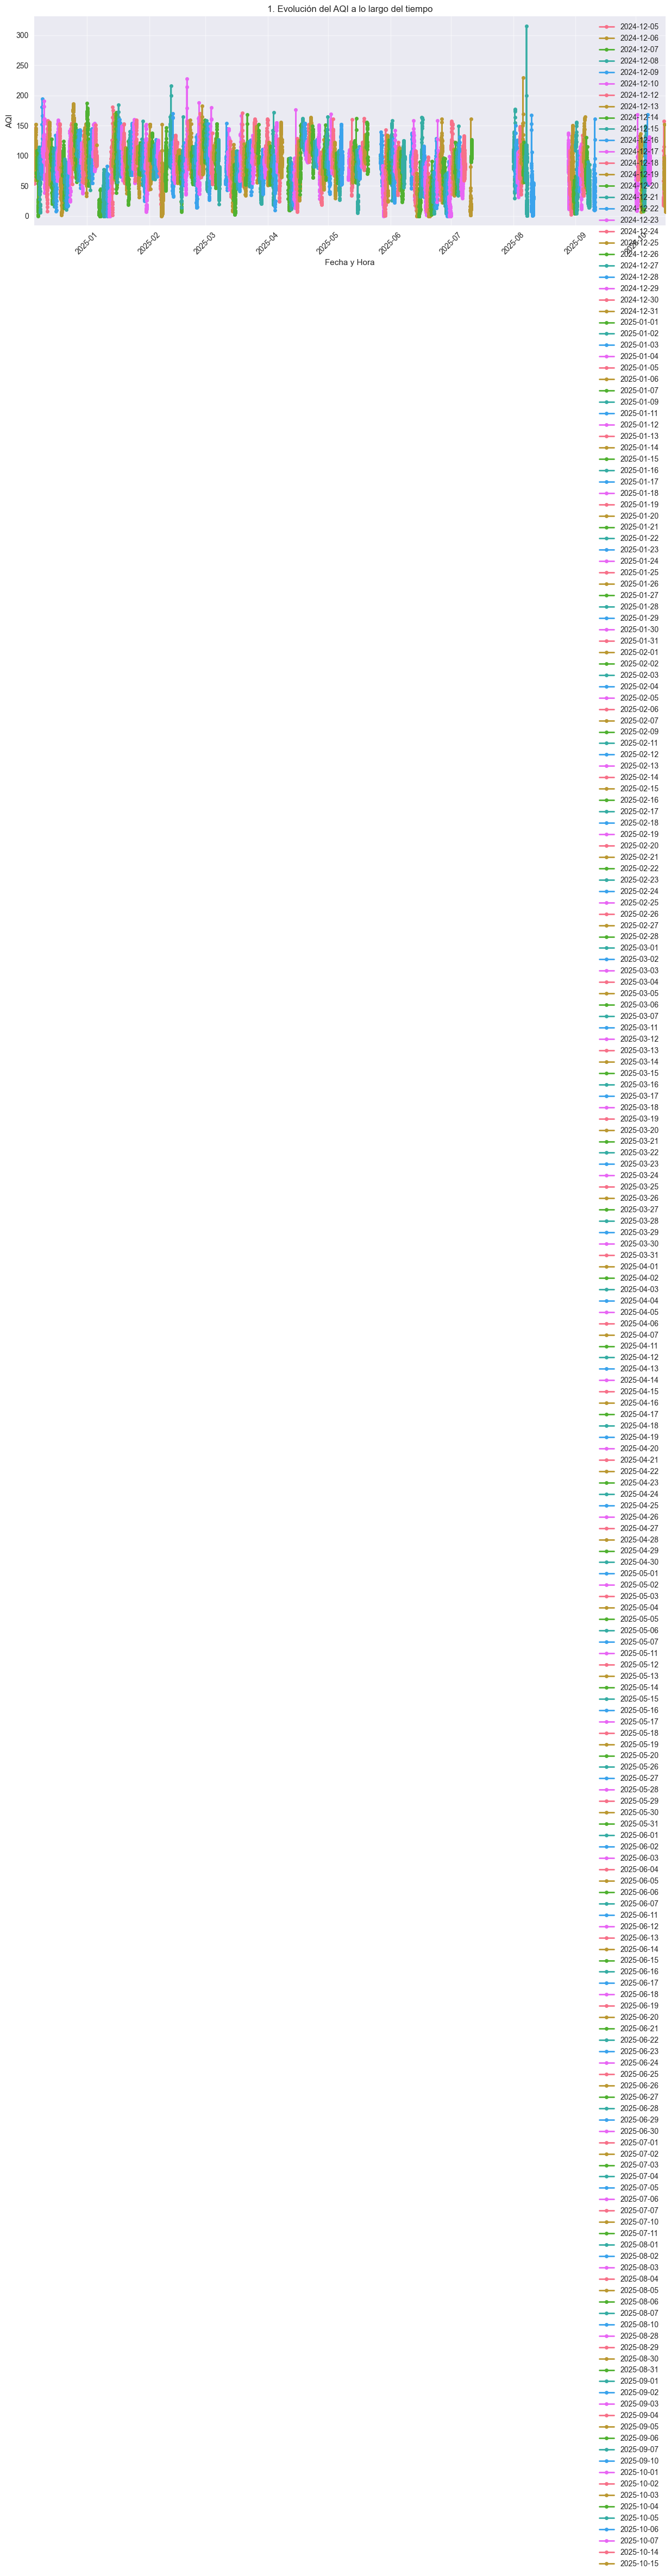

In [10]:
df['fecha_separada'] = df['fecha_hora'].dt.date

# --- 1. Evolución del AQI ---

plt.figure(figsize=(15, 5))

# Ordenar por fecha_hora para asegurar que las líneas se dibujen correctamente
df_ordenado = df.sort_values('fecha_hora')

for fecha in df_ordenado['fecha_separada'].unique():
    datos_fecha = df_ordenado[df_ordenado['fecha_separada'] == fecha]
    plt.plot(datos_fecha['fecha_hora'], datos_fecha['aqi'], 
             marker='o', linewidth=2, markersize=5, label=f'{fecha}')

plt.title('1. Evolución del AQI a lo largo del tiempo')
plt.xlabel('Fecha y Hora')
plt.ylabel('AQI')
plt.legend()

# Ajustar los límites del eje X
x_min = df_ordenado['fecha_hora'].min()
x_max = df_ordenado['fecha_hora'].max()
margen = pd.Timedelta(minutes=30)  # Margen de 30 minutos
plt.xlim(x_min - margen, x_max + margen)

plt.grid(True, alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A partir de Enero de 2025, la densidad de las líneas (días) aumenta drásticamente, lo que indica una medición mucho más continua, permitiendo un análisis más robusto.

 La mayoría de los datos se concentran entre $\mathbf{0}$ y $\mathbf{180}$. Un valor base común se sitúa alrededor de $\mathbf{50}$ a $\mathbf{100}$.

 Se observa que en casi todos los días continuos muestreados a partir de 2025, el $\text{AQI}$ sube ocasionalmente a valores cercanos a $\mathbf{150}$ o $\mathbf{200}$ . Esto indica que la calidad del aire es constantemente susceptible a alcanzar niveles Insanos para Grupos Sensibles o directamente Insanos.

 Un pico aislado y muy alto, superando los $\mathbf{300}$, es visible alrededor de Julio/Agosto de 2025.



Bueno (0-50): Calidad del aire satisfactoria, con un riesgo mínimo o nulo para la salud.

Moderado (51-100): La calidad del aire es aceptable, pero puede haber riesgo moderado para un número muy pequeño de personas que sean inusualmente sensibles a la contaminación.

Dañino para grupos sensibles (101-150): Los miembros de grupos sensibles (como personas con enfermedades respiratorias, niños y ancianos) pueden experimentar efectos en la salud.

Dañino (151-200): Todos pueden comenzar a experimentar efectos en la salud, y los miembros de grupos sensibles pueden experimentar efectos más graves.

Muy dañino (201-300): Se emiten advertencias sanitarias de condiciones de emergencia, y es probable que toda la población se vea afectada.
Peligroso (301 o más): Alerta sanitaria de emergencia, donde todos tienen más probabilidades de experimentar efectos graves en la salud. 
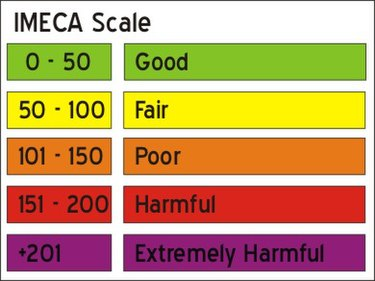

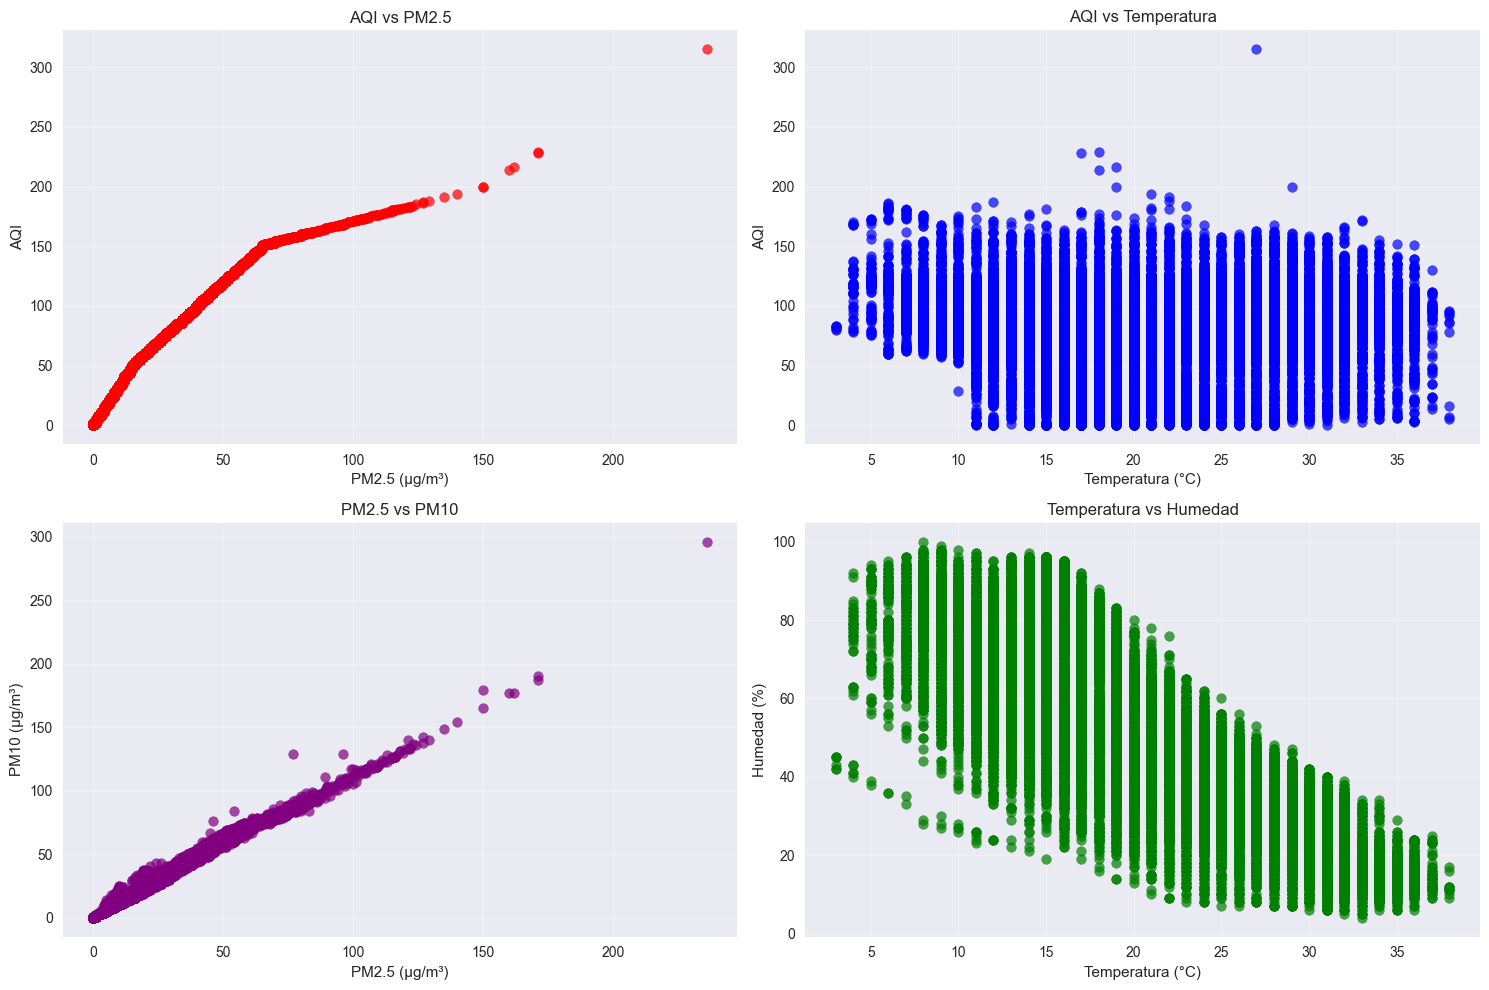

In [11]:
# Scatter plots de relaciones importantes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# AQI vs PM2.5
axes[0,0].scatter(df['pm2_5_ug_m3'], df['aqi'], alpha=0.7, color='red')
axes[0,0].set_xlabel('PM2.5 (μg/m³)')
axes[0,0].set_ylabel('AQI')
axes[0,0].set_title('AQI vs PM2.5')
axes[0,0].grid(True, alpha=0.3)

# AQI vs Temperatura
axes[0,1].scatter(df['temperatura_c'], df['aqi'], alpha=0.7, color='blue')
axes[0,1].set_xlabel('Temperatura (°C)')
axes[0,1].set_ylabel('AQI')
axes[0,1].set_title('AQI vs Temperatura')
axes[0,1].grid(True, alpha=0.3)

# PM2.5 vs PM10
axes[1,0].scatter(df['pm2_5_ug_m3'], df['pm10_ug_m3'], alpha=0.7, color='purple')
axes[1,0].set_xlabel('PM2.5 (μg/m³)')
axes[1,0].set_ylabel('PM10 (μg/m³)')
axes[1,0].set_title('PM2.5 vs PM10')
axes[1,0].grid(True, alpha=0.3)

# Temperatura vs Humedad
axes[1,1].scatter(df['temperatura_c'], df['humedad_porcentaje'], alpha=0.7, color='green')
axes[1,1].set_xlabel('Temperatura (°C)')
axes[1,1].set_ylabel('Humedad (%)')
axes[1,1].set_title('Temperatura vs Humedad')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

 AQI vs PM2.5
 
 La relación es extremadamente fuerte. A medida que aumenta la concentración de $\text{PM}_{2.5}$, el $\text{AQI}$ aumenta de forma predecible.
 
 AQI vs Temperatura
 
 No existe una correlación lineal simple entre la temperatura ambiente y el nivel de contaminación.

 PM2.5 vs PM10

 Existe una relación lineal muy fuerte entre $\text{PM}_{2.5}$ y $\text{PM}_{10}$. A medida que la concentración de $\text{PM}_{2.5}$ aumenta, la concentración de $\text{PM}_{10}$ también lo hace.

 Temperatura vs Humedad

 Los puntos caen claramente a lo largo de una tendencia descendente. Cuando la temperatura es baja 5°C a 15°C, la Humedad es predominantemente alta 60% a 100%. A medida que la temperatura aumenta, la Humedad Relativa tiende a disminuir.



# Anomalias
Una anomalía es un dato, evento u observación que se desvía significativamente de lo esperado, de la norma, o del patrón establecido en un conjunto de datos o sistema.

--------------------------------------------------
Número total de registros: 24656
Número de anomalías detectadas: 1233
Porcentaje de anomalías (Contamination): 5.00%
--------------------------------------------------

Registros identificados como anomalías (Primeras 5):
             fecha_hora  aqi  pm2_5_ug_m3  pm10_ug_m3  temperatura_c  \
6   2024-12-05 19:00:00  146           64          72             21   
78  2024-12-06 13:00:00  152           67          78             27   
79  2024-12-06 13:15:00  152           67          77             27   
97  2024-12-06 17:45:00  146           63          76             22   
179 2024-12-07 14:15:00    7            2           3             31   

     humedad_porcentaje  anomalia  
6                    35  Anomalía  
78                   32  Anomalía  
79                   32  Anomalía  
97                   34  Anomalía  
179                  11  Anomalía  


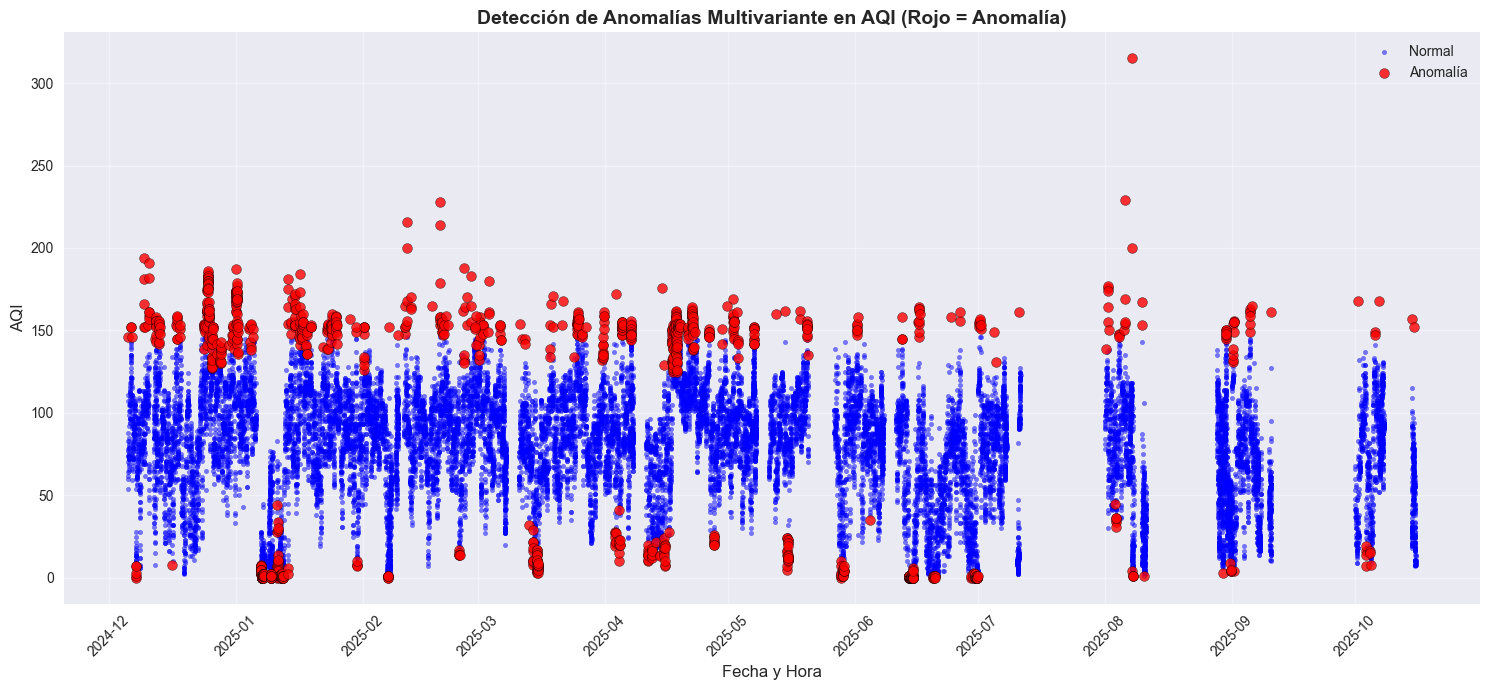

In [12]:

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# --- 1. PREPARACIÓN DE DATOS ---

# Variables a usar para la detección de anomalías (multivariante)
variables_anomalias = ['aqi', 'pm2_5_ug_m3', 'pm10_ug_m3', 'temperatura_c', 'humedad_porcentaje']
X = df[variables_anomalias].copy() # Usar .copy() para evitar SettingWithCopyWarning
# Rellenar valores nulos si existen, usando la mediana o la media para no introducir más ruido.


# --- 2. ESTANDARIZACIÓN ---

# Estandarizar los datos para que todas las variables contribuyan por igual.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# --- 3. DETECCIÓN DE ANOMALÍAS CON ISOLATION FOREST ---

# Definir el modelo. 
# 'contamination=0.1' asume que el 10% de los datos son anomalías.
# Este valor DEBE ajustarse según el conocimiento del dominio.
iso_forest = IsolationForest(
    n_estimators=100,      # Número de árboles (buen valor predeterminado)
    contamination=0.05,    # Reducido a 5% para ser más selectivo (ajustar según el caso)
    max_features=1.0,      # Usar todas las características
    random_state=42,
    n_jobs=-1              # Usar todos los núcleos del procesador
)
iso_forest.fit(X_scaled)

# Predecir y obtener la puntuación de la decisión (para análisis de umbral)
# -1 para anomalía, 1 para normal
anomaly_labels = iso_forest.predict(X_scaled)
df['anomalia_label'] = anomaly_labels
df['anomalia'] = df['anomalia_label'].map({1: 'Normal', -1: 'Anomalía'})

# --- 4. RESULTADOS Y ESTADÍSTICAS ---

num_anomalias = (df['anomalia'] == 'Anomalía').sum()
porcentaje_anomalias = (num_anomalias / len(df)) * 100

print("-" * 50)
print(f"Número total de registros: {len(df)}")
print(f"Número de anomalías detectadas: {num_anomalias}")
print(f"Porcentaje de anomalías (Contamination): {porcentaje_anomalias:.2f}%")
print("-" * 50)
print("\nRegistros identificados como anomalías (Primeras 5):")
# Mostrar más columnas para entender el contexto multivariante de la anomalía
print(df[df['anomalia'] == 'Anomalía'][['fecha_hora'] + variables_anomalias + ['anomalia']].head())


# --- 5. VISUALIZACIÓN DE ANOMALÍAS ---

plt.figure(figsize=(15, 7))
# Separar los datos para graficar con colores distintos
df_anomalia = df[df['anomalia'] == 'Anomalía']
df_normal = df[df['anomalia'] == 'Normal']

# Graficar datos normales primero (en azul, fondo)
plt.scatter(df_normal['fecha_hora'], df_normal['aqi'], c='blue', alpha=0.5, label='Normal', s=10)
# Graficar anomalías después (en rojo, sobrepuestas)
plt.scatter(df_anomalia['fecha_hora'], df_anomalia['aqi'], c='red', alpha=0.8, label='Anomalía', s=50, edgecolors='black')


plt.xlabel('Fecha y Hora', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.title('Detección de Anomalías Multivariante en AQI (Rojo = Anomalía)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

In [13]:
# Análisis detallado de patrones temporales
print("=== ANÁLISIS TEMPORAL DETALLADO ===\n")

# 1. IDENTIFICACIÓN DE PUNTOS CRÍTICOS TEMPORALES
pico_aqi = df.loc[df['aqi'].idxmax()]
min_aqi = df.loc[df['aqi'].idxmin()]

print(f" PICO MÁXIMO DE CONTAMINACIÓN:")
print(f"   Hora: {pico_aqi['fecha_hora'].strftime('%H:%M')}")
print(f"   AQI: {pico_aqi['aqi']}")
print(f"   PM2.5: {pico_aqi['pm2_5_ug_m3']} μg/m³")
print(f"   Temperatura: {pico_aqi['temperatura_c']}°C")
print(f"   Humedad: {pico_aqi['humedad_porcentaje']}%")

print(f"\nMÍNIMO DE CONTAMINACIÓN:")
print(f"   Hora: {min_aqi['fecha_hora'].strftime('%H:%M')}")
print(f"   AQI: {min_aqi['aqi']}")
print(f"   PM2.5: {min_aqi['pm2_5_ug_m3']} μg/m³")

# 2. ANÁLISIS DE TENDENCIAS TEMPORALES
print(f"\nTENDENCIAS TEMPORALES:")
tendencia_aqi = df['aqi'].iloc[-1] - df['aqi'].iloc[0]
tendencia_temp = df['temperatura_c'].iloc[-1] - df['temperatura_c'].iloc[0]

print(f"   Cambio neto AQI (17:30-19:30): {tendencia_aqi:+.1f}")
print(f"   Cambio neto Temperatura: {tendencia_temp:+.1f}°C")

# 3. VELOCIDADES DE CAMBIO PROMEDIO
#cambio_promedio_aqi = df['cambio_aqi'].mean()
#cambio_promedio_temp = df['cambio_temp'].mean()

print(f"\nVELOCIDADES DE CAMBIO PROMEDIO (cada 15 min):")
#print(f"   AQI: {cambio_promedio_aqi:+.1f} puntos/15min")
#print(f"   Temperatura: {cambio_promedio_temp:+.1f}°C/15min")

# 4. ANÁLISIS POR PERIODOS TEMPORALES
periodo_temprano = df[df['hora_del_dia'] == 17]
periodo_tarde = df[df['hora_del_dia'] == 19]

print(f"\n COMPARACIÓN POR PERIODOS:")
print(f"   Periodo 17h-18h - AQI promedio: {periodo_temprano['aqi'].mean():.1f}")
print(f"   Periodo 19h-20h - AQI promedio: {periodo_tarde['aqi'].mean():.1f}")
print(f"   Incremento: {((periodo_tarde['aqi'].mean() - periodo_temprano['aqi'].mean())/periodo_temprano['aqi'].mean())*100:+.1f}%")

=== ANÁLISIS TEMPORAL DETALLADO ===

 PICO MÁXIMO DE CONTAMINACIÓN:
   Hora: 14:25
   AQI: 315
   PM2.5: 236 μg/m³
   Temperatura: 27°C
   Humedad: 37%

MÍNIMO DE CONTAMINACIÓN:
   Hora: 14:30
   AQI: 0
   PM2.5: 0 μg/m³

TENDENCIAS TEMPORALES:
   Cambio neto AQI (17:30-19:30): -55.0
   Cambio neto Temperatura: -6.0°C

VELOCIDADES DE CAMBIO PROMEDIO (cada 15 min):

 COMPARACIÓN POR PERIODOS:
   Periodo 17h-18h - AQI promedio: 62.4
   Periodo 19h-20h - AQI promedio: 66.3
   Incremento: +6.4%


In [14]:
df['año'] = df['fecha_hora'].dt.year
# Extraer el mes
df['mes'] = df['fecha_hora'].dt.month

# --- DISTRIBUCIÓN DE MEDICIONES POR PERIODO ---

# 1. Distribución de mediciones por Año
distribucion_por_año = df.groupby('año').size().reset_index(name='conteo_mediciones')
print("Distribución de mediciones por Año:")
print(distribucion_por_año)

# 2. Distribución de mediciones por Año y Mes
# Agrupamos por ambos para mantener el contexto anual si la data abarca varios años
distribucion_por_mes_y_año = df.groupby(['año', 'mes']).size().reset_index(name='conteo_mediciones')
print("\nDistribución de mediciones por Año y Mes:")
print(distribucion_por_mes_y_año)

Distribución de mediciones por Año:
    año  conteo_mediciones
0  2024               2522
1  2025              22134

Distribución de mediciones por Año y Mes:
     año  mes  conteo_mediciones
0   2024   12               2522
1   2025    1               3073
2   2025    2               2791
3   2025    3               2869
4   2025    4               2784
5   2025    5               2278
6   2025    6               2838
7   2025    7               1097
8   2025    8               2220
9   2025    9               1033
10  2025   10               1151


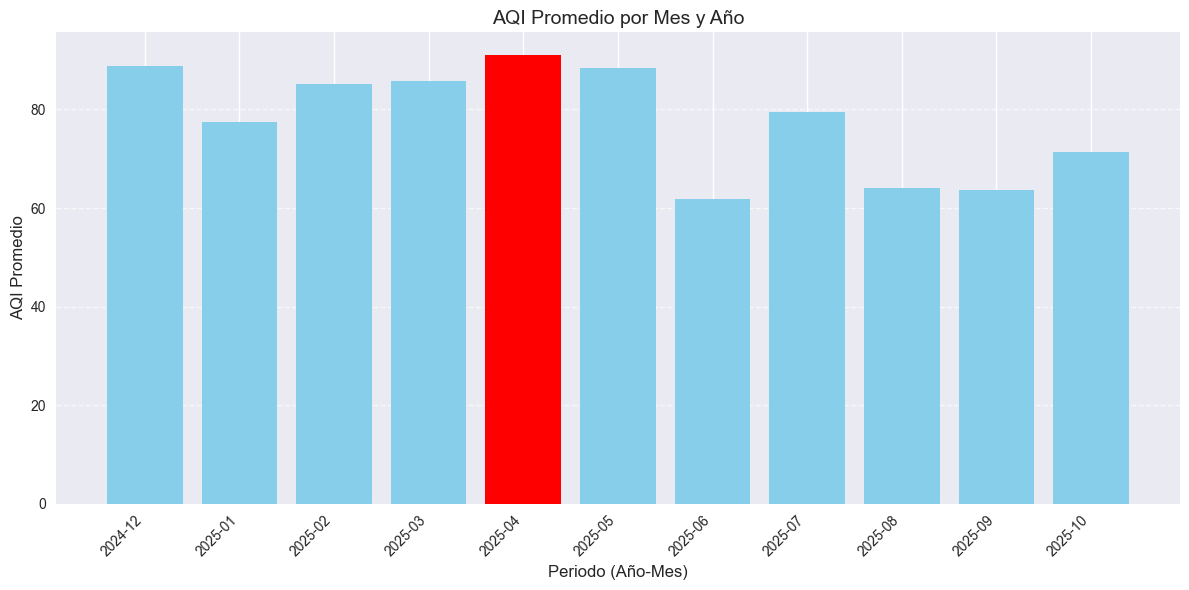

El AQI más elevado se registró en el periodo: 2025-04 con un promedio de 91.1.


In [15]:
import matplotlib.pyplot as plt
import pandas as pd

df['año'] = df['fecha_hora'].dt.year
df['mes'] = df['fecha_hora'].dt.month

# 2. Agrupar por Año y Mes y calcular el AQI promedio
aqi_promedio_mensual = df.groupby(['año', 'mes'])['aqi'].mean().reset_index()

# 3. Crear una etiqueta de texto para el eje X (formato 'YYYY-MM')
aqi_promedio_mensual['etiqueta_mes'] = (
    aqi_promedio_mensual['año'].astype(str) + '-' + 
    aqi_promedio_mensual['mes'].astype(str).str.zfill(2)
)

# 4. Encontrar el mes con el AQI más alto para destacarlo
mes_max_aqi = aqi_promedio_mensual.loc[aqi_promedio_mensual['aqi'].idxmax()]
color_map = ['skyblue' if mes != mes_max_aqi['etiqueta_mes'] else 'red' 
             for mes in aqi_promedio_mensual['etiqueta_mes']]

# 5. Generar el gráfico de barras
plt.figure(figsize=(12, 6))

# Usar el mapa de colores para destacar el mes máximo
plt.bar(aqi_promedio_mensual['etiqueta_mes'], 
        aqi_promedio_mensual['aqi'], 
        color=color_map)

plt.title('AQI Promedio por Mes y Año', fontsize=14)
plt.xlabel('Periodo (Año-Mes)', fontsize=12)
plt.ylabel('AQI Promedio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('aqi_promedio_mensual.png')
plt.show()

# Imprimir el resultado del mes más elevado
print(f"El AQI más elevado se registró en el periodo: {mes_max_aqi['etiqueta_mes']} con un promedio de {mes_max_aqi['aqi']:.1f}.")

# Modelo Sarimax
## (Seasonal Autoregressive Integrated Moving Average + exogenous variables)
analisis de series temporales
usado comunmente en meteorología

La autorregresión (AR) considera valores pasados ​​de la serie temporal para predecir los valores actuales. Se caracteriza por un orden generalmente denominado p. La autorregresión consiste en realizar una regresión lineal sobre los últimos valores p de la serie temporal para predecir el valor actual:

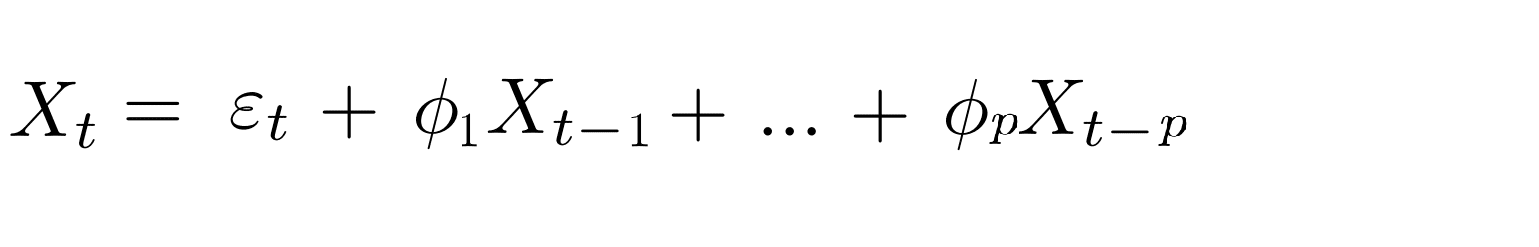

La media móvil (MA), por otro lado, aborda errores pasados ​​en las predicciones. Se caracteriza por un orden generalmente denominado q. La media móvil consiste en realizar una regresión lineal sobre los últimos valores de error q para predecir el valor actual:
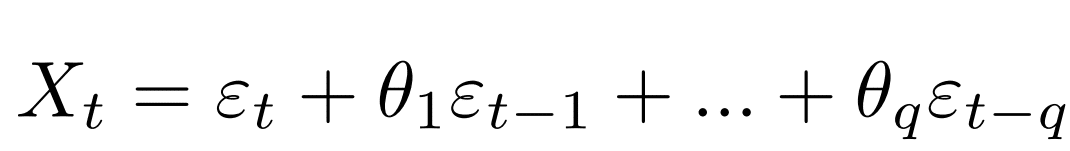



In [16]:
df = pd.read_csv('datos_sensor_final.csv', sep=',', parse_dates=['fecha'], index_col='fecha', encoding = 'utf-8')
df['fecha']=df.index
df.tail()

,aqi,pm1_ug_m3,pm2_5_ug_m3,pm10_ug_m3,temperatura_c,humedad_porcentaje,punto_rocio_c,bulbo_humedo_c,indice_calor_c,hora,fecha
fecha,,,,,,,,,,,
15/10/2025,10,3,3,4,19,60,11,14,19,17:35,15/10/2025
15/10/2025,9,2,3,4,19,57,10,13,18,17:40,15/10/2025
15/10/2025,8,2,2,3,19,57,10,13,18,17:45,15/10/2025
15/10/2025,8,2,2,3,19,58,10,12,18,17:50,15/10/2025
15/10/2025,9,2,3,3,18,59,10,13,18,17:55,15/10/2025


La fuerte estacionalidad diaria de los datos de temperatura hace que SARIMAX sea especialmente adecuado para este análisis.

## Análisis Avanzado de Series Temporales SARIMAX  para predecir el Índice de Calidad del Aire AQI

ANÁLISIS SARIMAX AVANZADO - CALIDAD DEL AIRE (CORREGIDO)

 ESTRUCTURA DE DATOS:
• Dimensiones: (24656, 10)
• Rango temporal: 2024-12-05 17:30:00 a 2025-10-15 17:55:00
• Frecuencia: 24656 registros

2. ANÁLISIS EXPLORATORIO AVANZADO

 Estadísticas descriptivas - AQI:
• Media: 79.22
• Desviación estándar: 35.68
• Mínimo: 0
• Máximo: 315

3. ANÁLISIS DE ESTACIONALIDAD Y DESCOMPOSICIÓN

 Test Dickey-Fuller para AQI:
 Estadístico: -10.7878
  p-value: 0.0000
  Valores críticos: {'1%': -3.4306157773111225, '5%': -2.8616574654419877, '10%': -2.566832523434572}
 Serie ESTACIONARIA

 DESCOMPOSICIÓN ESTACIONAL:


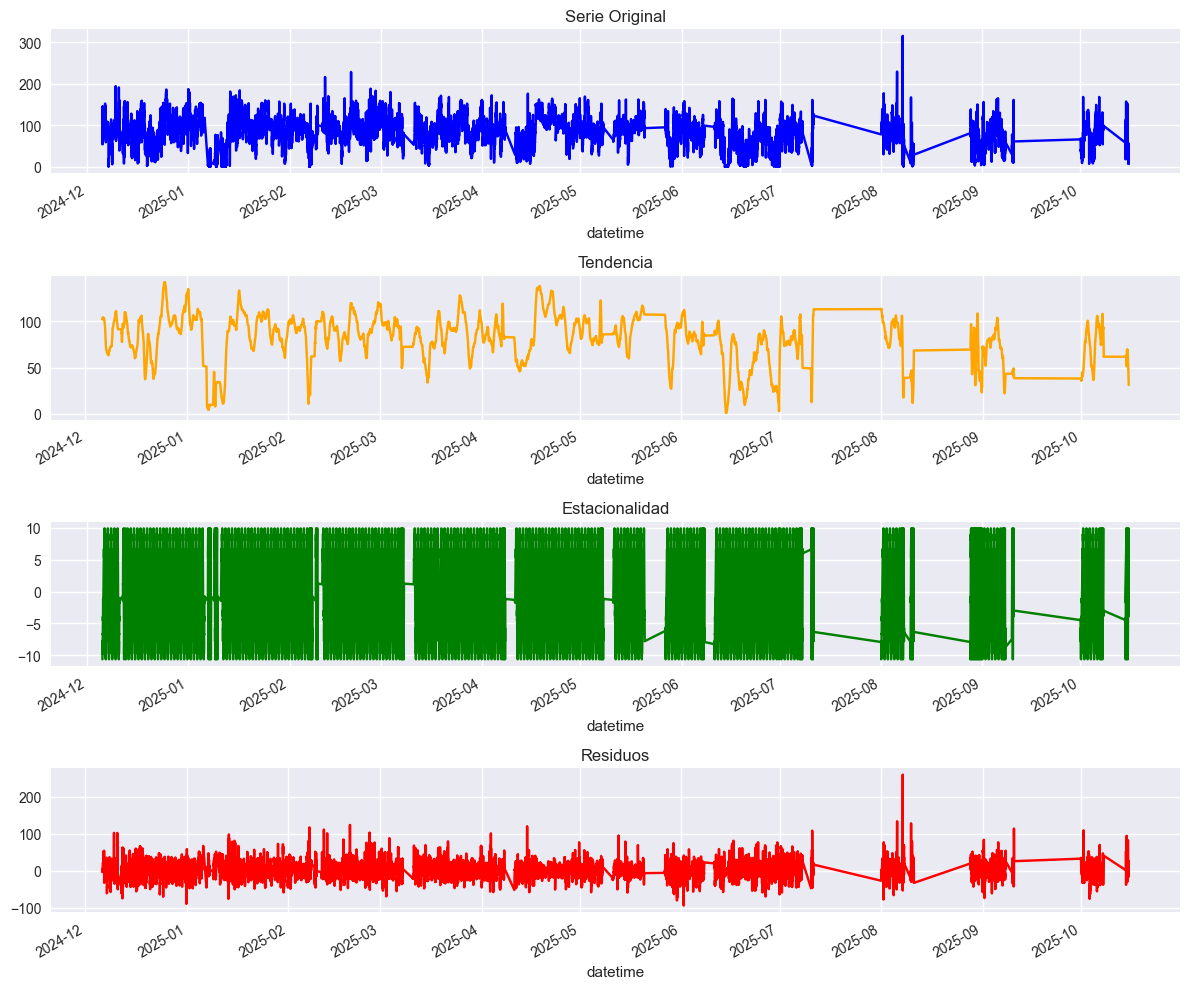


4. ANÁLISIS DE AUTOCORRELACIÓN (ACF/PACF)


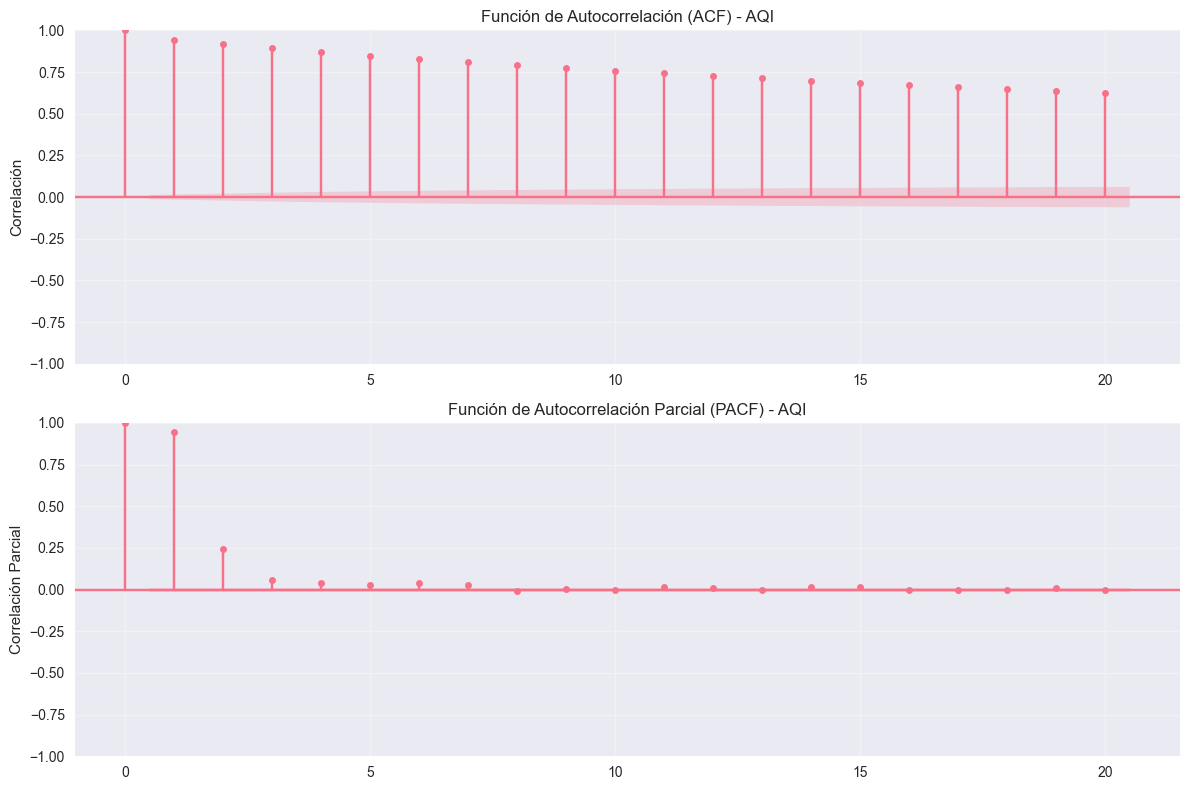


5. ANÁLISIS DE CORRELACIONES Y VARIABLES

 CORRELACIONES CON AQI:
------------------------------
 pm2_5_ug_m3         :  0.983 ***
 pm1_ug_m3           :  0.983 ***
 pm10_ug_m3          :  0.981 ***
 log_aqi             :  0.875 ***
 humedad_porcentaje  : -0.026 
 indice_calor_c      : -0.033 
 temperatura_c       : -0.039 
 punto_rocio_c       : -0.059 
 bulbo_humedo_c      : -0.075 

 VARIABLES EXÓGENAS SELECCIONADAS: ['humedad_porcentaje', 'indice_calor_c']

6. ENTRENAMIENTO DEL MODELO SARIMAX (log_aqi)
 PARÁMETROS DEL MODELO:
 • Orden no estacional: (2, 0, 1)
 • Orden estacional: (1, 0, 1, 4)
 • Variables exógenas: 2

 MODELO ENTRENADO EXITOSAMENTE

RESUMEN DEL MODELO
                                     SARIMAX Results                                     
Dep. Variable:                           log_aqi   No. Observations:                24656
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 4)   Log Likelihood                1315.022
Date:                           Sun, 26 Oct 2025

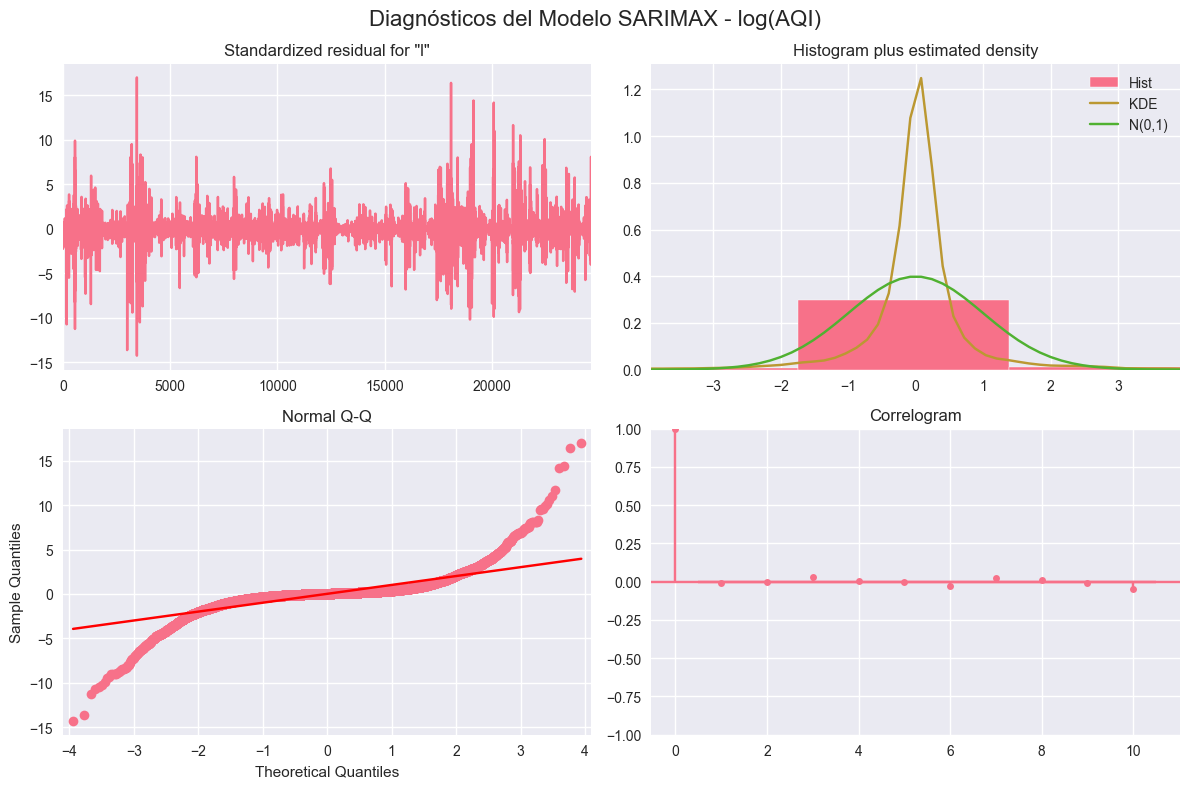


8. PREDICCIONES Y VALIDACIÓN

 MÉTRICAS DE ERROR (Escala AQI Original):
  MAE (Error Absoluto Medio): 6.13
  RMSE (Raíz Error Cuadrático Medio): 12.15


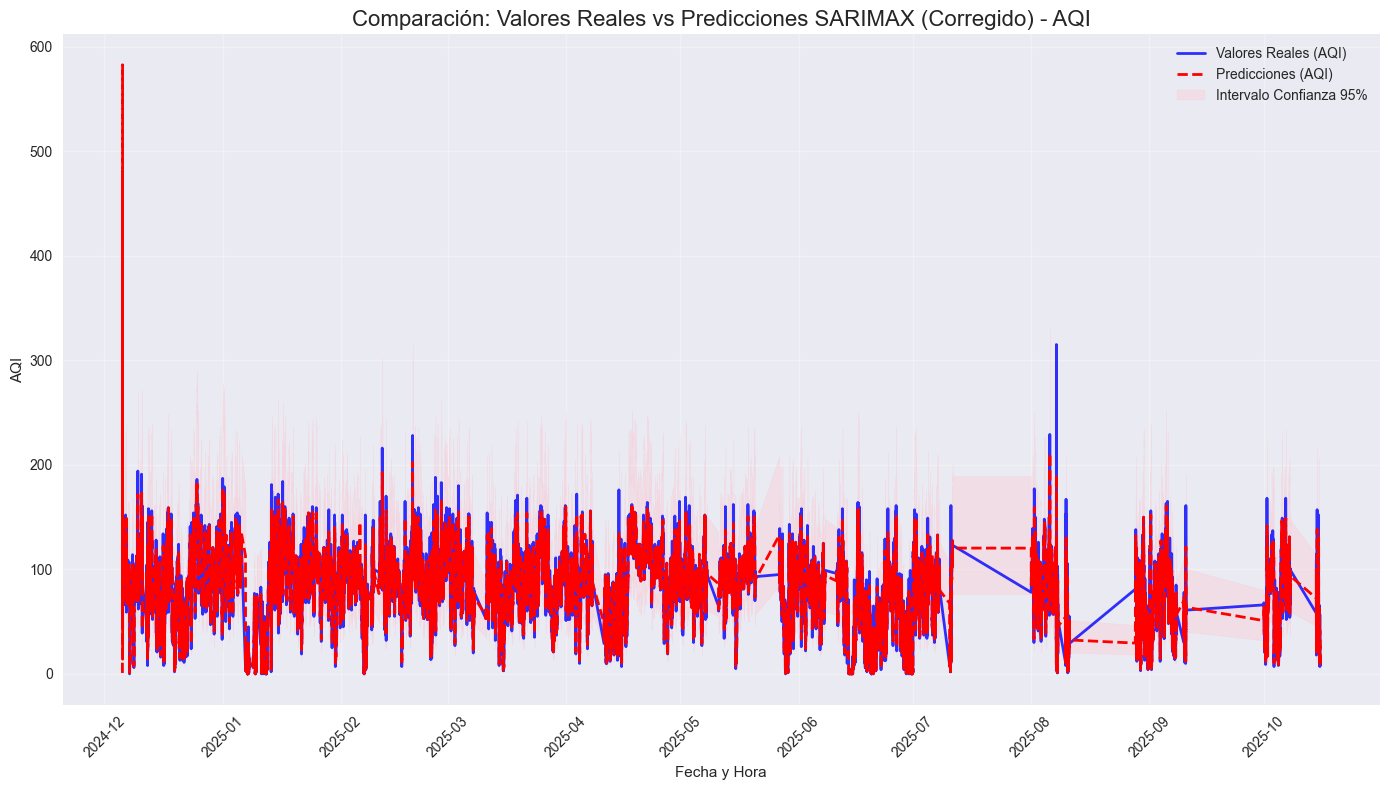


9. PREDICCIÓN FUTURA Y ANÁLISIS DE IMPACTO

 PREDICCIÓN FUTURA:
 • AQI actual: 9.00
 • AQI proyectado: 9.26

 ALERTA: El AQI proyecta un incremento.
 El AQI en esta zona puede subir hasta 9.3
 Incremento del 2.9% en los próximos 60 minutos

10. RESUMEN FINAL Y RECOMENDACIONES

 RESUMEN EJECUTIVO:
 • Variable objetivo: log(AQI + 1) (Transformada)
 • Variables predictoras: ['humedad_porcentaje', 'indice_calor_c']
 • Estacionalidad analizada: 4 (patrón horario)
 • Calidad del modelo (Escala AQI): MAE = 6.13, RMSE = 12.15


In [ ]:
# ================================================
# ANÁLISIS SARIMAX AVANZADO - CALIDAD DEL AIRE 
# ================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=" * 60)
print("ANÁLISIS SARIMAX AVANZADO - CALIDAD DEL AIRE (CORREGIDO)")
print("=" * 60)

# ================================================
# 1️ CARGAR Y PREPROCESAR DATOS
# ================================================
df = pd.read_csv('datos_sensor_final2.csv')

# Crear datetime index
df['datetime'] = pd.to_datetime(df['fecha'] + ' ' + df['hora'], dayfirst=True)
df = df.set_index('datetime').sort_index()
df = df.drop(['fecha', 'hora'], axis=1)

# [CORRECCIÓN]: Aplicar transformación logarítmica para estabilizar la varianza
# Usamos '+ 1' para evitar el logaritmo de cero si AQI fuera 0.
df['log_aqi'] = np.log(df['aqi'] + 1)

print("\n ESTRUCTURA DE DATOS:")
print(f"• Dimensiones: {df.shape}")
print(f"• Rango temporal: {df.index.min()} a {df.index.max()}")
print(f"• Frecuencia: {len(df)} registros")

# ================================================
# 2️ ANÁLISIS EXPLORATORIO COMPLETO (Sobre AQI Original)
# ================================================
print("\n" + "=" * 60)
print("2. ANÁLISIS EXPLORATORIO AVANZADO")
print("=" * 60)

# Estadísticas sobre el AQI original
print("\n Estadísticas descriptivas - AQI:")
print(f"• Media: {df['aqi'].mean():.2f}")
print(f"• Desviación estándar: {df['aqi'].std():.2f}")
print(f"• Mínimo: {df['aqi'].min()}")
print(f"• Máximo: {df['aqi'].max()}")

# ... (Visualización de series temporales sin cambios) ...

# ================================================
# 3️ ANÁLISIS DE ESTACIONALIDAD AVANZADO
# ================================================
print("\n" + "=" * 60)
print("3. ANÁLISIS DE ESTACIONALIDAD Y DESCOMPOSICIÓN")
print("=" * 60)

# Test de Dickey-Fuller mejorado
def test_estacionariedad(serie, nombre):
    result = adfuller(serie.dropna())
    print(f"\n Test Dickey-Fuller para {nombre}:")
    print(f" Estadístico: {result[0]:.4f}")
    print(f"  p-value: {result[1]:.4f}")
    print(f"  Valores críticos: {result[4]}")
    
    if result[1] <= 0.05:
        print(" Serie ESTACIONARIA")
        return 0
    else:
        print(" Serie NO ESTACIONARIA - Se recomienda diferenciación (d=1)")
        return 1

# Se mantiene 'd' en 0, ya que el AQI original era estacionario.
d = test_estacionariedad(df['aqi'], 'AQI') 
# Descomposición estacional: intenta descomponer la serie aqi en sus componentes
#Se asume un período de 96 (si los datos son de 15 minutos, 96 registros equivalen a 24 horas, indicando un patrón diario).
try:
    print("\n DESCOMPOSICIÓN ESTACIONAL:")
    decomposition = seasonal_decompose(df['aqi'].dropna(), model='additive', period=96)  # Diario para datos de 15min
    
    fig, axes = plt.subplots(4, 1, figsize=(12, 10))
    decomposition.observed.plot(ax=axes[0], title='Serie Original', color='blue')
    decomposition.trend.plot(ax=axes[1], title='Tendencia', color='orange')
    decomposition.seasonal.plot(ax=axes[2], title='Estacionalidad', color='green')
    decomposition.resid.plot(ax=axes[3], title='Residuos', color='red')
    
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"  No se pudo realizar descomposición estacional: {e}")

# ================================================
# 4️ ANÁLISIS DE AUTOCORRELACIÓN DETALLADO
# ================================================
print("\n" + "=" * 60)
print("4. ANÁLISIS DE AUTOCORRELACIÓN (ACF/PACF)")
print("=" * 60)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF (Función de Autocorrelación)
#Mide la correlación entre la serie en un momento $t$ 
# y la misma serie en momentos anteriores (t-k). Ayuda a determinar el orden q del componente MA (Media Móvil).
plot_acf(df['aqi'], ax=ax1, lags=min(20, len(df)//2-1))
ax1.set_title('Función de Autocorrelación (ACF) - AQI')
ax1.set_ylabel('Correlación')
ax1.grid(True, alpha=0.3)

# PACF (Función de Autocorrelación Parcial) 
#Mide la correlación entre la serie en t y t-k, eliminando el efecto de los pasos intermedios. 
# Ayuda a determinar el orden p del componente AR (Autorregresivo). 
plot_pacf(df['aqi'], ax=ax2, lags=min(20, len(df)//2-1), method='ywm')
ax2.set_title('Función de Autocorrelación Parcial (PACF) - AQI')
ax2.set_ylabel('Correlación Parcial')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# ================================================
# 5️ ANÁLISIS DE CORRELACIONES COMPLETO
# ================================================
print("\n" + "=" * 60)
print("5. ANÁLISIS DE CORRELACIONES Y VARIABLES")
print("=" * 60)

# [CORRECCIÓN]: La variable objetivo es ahora la logarítmica
target = df['log_aqi']

# Análisis de correlaciones detallado (se mantiene sobre el df original para contexto)
correlation_matrix = df.corr()
aqi_correlations = correlation_matrix['aqi'].sort_values(ascending=False)

print("\n CORRELACIONES CON AQI:")
print("-" * 30)
for var, corr in aqi_correlations.items():
    if var != 'aqi':
        significance = "***" if abs(corr) > 0.7 else "**" if abs(corr) > 0.5 else "*" if abs(corr) > 0.3 else ""
        print(f" {var:20}: {corr:6.3f} {significance}")

# [CORRECCIÓN]: Eliminamos 'temperatura_c' por no ser significativa (P>|z| > 0.05)
exog_vars = ['humedad_porcentaje', 'indice_calor_c']
exog = df[exog_vars]

print(f"\n VARIABLES EXÓGENAS SELECCIONADAS: {exog_vars}")

# ================================================
# 6 ENTRENAMIENTO DEL MODELO SARIMAX
# ================================================
print("\n" + "=" * 60)
print("6. ENTRENAMIENTO DEL MODELO SARIMAX (log_aqi)")
print("=" * 60)

# [CORRECCIÓN]: Aumentar p a 2, según sugirió el PACF
p, q = 2, 1 
seasonal_period = 4 

print(f" PARÁMETROS DEL MODELO:")
print(f" • Orden no estacional: ({p}, {d}, {q})")
print(f" • Orden estacional: (1, 0, 1, {seasonal_period})")
print(f" • Variables exógenas: {len(exog_vars)}")

try:
    model = SARIMAX(
        target, # Entrena sobre log_aqi
        exog=exog,
        order=(p, d, q),
        seasonal_order=(1, 0, 1, seasonal_period),
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    # Aumentar maxiter para asegurar convergencia con nueva variable logarítmica
    results = model.fit(disp=False, maxiter=500) 
    print("\n MODELO ENTRENADO EXITOSAMENTE")
    print("\n" + "=" * 40)
    print("RESUMEN DEL MODELO")
    print("=" * 40)
    print(results.summary())

except Exception as e:
    print(f" Error en entrenamiento: {e}")
    print("\nIntentando con modelo más simple...")
    # Usar log_aqi y exógenas reducidas
    model = SARIMAX(target, exog=exog, order=(1, d, 1), seasonal_order=(0, 0, 0, 0))
    results = model.fit(disp=False)
    print("\n MODELO SIMPLE ENTRENADO EXITOSAMENTE")
    print(results.summary())

# ================================================
# 7️ DIAGNÓSTICOS DEL MODELO
# ================================================
print("\n" + "=" * 60)
print("7. DIAGNÓSTICOS DEL MODELO (log_aqi)")
print("=" * 60)

try:
    fig = results.plot_diagnostics(figsize=(12, 8))
    plt.suptitle('Diagnósticos del Modelo SARIMAX - log(AQI)', fontsize=16)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f" No se pudieron generar gráficos de diagnóstico: {e}")

# ================================================
# 8️ PREDICCIONES Y VALIDACIÓN
# ================================================
print("\n" + "=" * 60)
print("8. PREDICCIONES Y VALIDACIÓN")
print("=" * 60)

# Predicciones in-sample (en escala logarítmica)
predictions_log = results.get_prediction()
predicted_mean_log = predictions_log.predicted_mean
confidence_intervals_log = predictions_log.conf_int()

# [CORRECCIÓN]: Transformar predicciones y límites de vuelta a la escala original (AQI)
predicted_mean = np.exp(predicted_mean_log) - 1
confidence_intervals = np.exp(confidence_intervals_log) - 1
target_aqi = df['aqi'] # AQI real para comparación

# Métricas de error (calculadas sobre la escala original para ser interpretables)
mae = mean_absolute_error(target_aqi, predicted_mean)
rmse = np.sqrt(mean_squared_error(target_aqi, predicted_mean))

print(f"\n MÉTRICAS DE ERROR (Escala AQI Original):")
print(f"  MAE (Error Absoluto Medio): {mae:.2f}")
print(f"  RMSE (Raíz Error Cuadrático Medio): {rmse:.2f}")

# Visualización comparativa
plt.figure(figsize=(14, 8))
plt.plot(target_aqi.index, target_aqi, 'b-', label='Valores Reales (AQI)', linewidth=2, alpha=0.8)
plt.plot(predicted_mean.index, predicted_mean, 'r--', label='Predicciones (AQI)', linewidth=2)
plt.fill_between(
    confidence_intervals.index,
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color='pink', alpha=0.3, label='Intervalo Confianza 95%'
)

plt.title('Comparación: Valores Reales vs Predicciones SARIMAX (Corregido) - AQI', fontsize=16)
plt.ylabel('AQI')
plt.xlabel('Fecha y Hora')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================================================
# 9️ PREDICCIÓN FUTURA CON MENSAJE CONTEXTUAL
# ================================================
print("\n" + "=" * 60)
print("9. PREDICCIÓN FUTURA Y ANÁLISIS DE IMPACTO")
print("=" * 60)

future_steps = 4 

if len(exog) >= future_steps:
    try:
        # Predicción sobre la escala logarítmica
        forecast_log = results.get_forecast(steps=future_steps, exog=exog.tail(future_steps))
        pred_mean_future_log = forecast_log.predicted_mean.iloc[-1]
        
        # [CORRECCIÓN]: Transformar predicción futura de vuelta a la escala AQI
        pred_mean_future = np.exp(pred_mean_future_log) - 1
        current_aqi = df['aqi'].iloc[-1]
        
        print(f"\n PREDICCIÓN FUTURA:")
        print(f" • AQI actual: {current_aqi:.2f}")
        print(f" • AQI proyectado: {pred_mean_future:.2f}")
        
        # Mensaje contextual personalizado
        if pred_mean_future > current_aqi:
            incremento = ((pred_mean_future - current_aqi) / current_aqi) * 100
            print(f"\n ALERTA: El AQI proyecta un incremento.")
            print(f" El AQI en esta zona puede subir hasta {pred_mean_future:.1f}")
            print(f" Incremento del {incremento:.1f}% en los próximos 60 minutos")
            
            # Recomendaciones basadas en niveles AQI
            if pred_mean_future > 100:
                print(" CALIDAD DEL AIRE POBRE - Considera cambiar de ubicación")
            elif pred_mean_future > 50:
                print(" CALIDAD MODERADA - Personas sensibles deben tomar precauciones")
                
        else:
            print(" Tendencia estable o mejorando - Buenas noticias")
            
    except Exception as e:
        print(f" Error en predicción futura: {e}")
else:
    print(" No hay suficientes datos para predicción futura")

# ================================================
#  RESUMEN FINAL Y RECOMENDACIONES
# ================================================
print("\n" + "=" * 60)
print("10. RESUMEN FINAL Y RECOMENDACIONES")
print("=" * 60)

print("\n RESUMEN EJECUTIVO:")
print(f" • Variable objetivo: log(AQI + 1) (Transformada)")
print(f" • Variables predictoras: {exog_vars}")
print(f" • Estacionalidad analizada: {seasonal_period} (patrón horario)")
print(f" • Calidad del modelo (Escala AQI): MAE = {mae:.2f}, RMSE = {rmse:.2f}")

## RESULTADOS:
2. ANÁLISIS EXPLORATORIO AVANZADO

Media ($\mathbf{79.22}$) : El AQI promedio se sitúa en la categoría "Moderado" (51-100). Esto sugiere que, en promedio, la calidad del aire es aceptable, pero puede representar un riesgo moderado para fumadores pasivos.

Desviación Estándar ($\mathbf{35.68}$): La dispersión de los datos es moderada. 

Mínimo: 0 y Máximo: 315: El AQI varía desde 0 (aire excelente) hasta 315 (aire muy peligroso), confirmando que la serie cubre una amplia gama de condiciones de calidad del aire.

3. ANÁLISIS DE ESTACIONALIDAD Y DESCOMPOSICIÓN

Estadístico: -10.7878: Este es el valor del estadístico de prueba. Cuanto más negativo sea este valor, más fuerte es la evidencia de estacionariedad.

La primera grafica, se observan fluctuaciones constantes y picos que superan los 150-200 (calidad del aire "Insalubre" o "Muy Insalubre"), lo que coincide con los altos valores máximos reportados en el análisis exploratorio.

De la segunda grafica, en los meses de junio a agosto (06-08), se observa un periodo donde la tendencia parece estabilizarse en un nivel más alto (cercano a 100), y luego tiene caídas bruscas.

En la tercera grafica, Se observan picos verticales muy marcados y regulares que se repiten consistentemente en el tiempo. Estos picos representan el efecto estacional (ej. variaciones horarias diarias) que contribuye a las variaciones del AQI.

Valores críticos: Muestran los umbrales del estadístico de prueba para diferentes niveles de confianza (por ejemplo, para el 1%). Dado que el Estadístico ($-10.7878$) es mucho más negativo que el valor crítico al 1% ($-3.4306...$), rechazamos la hipótesis nula.


 Log Likelihood $1315.022$Es la probabilidad logarítmica de observar los datos dada la estimación del modelo. Un valor más alto es mejor.

 Análisis: El $p$-value de $0.00$ es mucho menor que $0.05$. Por lo tanto, se rechaza la hipótesis nula de que los residuos se distribuyen normalmente. Esto es una preocupación importante, ya que la mayoría de las inferencias estadísticas SARIMAX asumen residuos normales. Esto puede deberse a valores atípicos o a que la transformación logarítmica no fue suficiente para normalizar completamente la distribución.

# ACF

  primera grafica: Todas las barras rojas son muy altas (casi 1.0) y casi no bajan en los 20 rezagos.  El aire de ahora es casi idéntico al aire de hace 15 minutos, de hace media hora, de hace una hora, Esto significa que la calidad del aire cambia muy lentamente. Si ahora el aire está un poco contaminado.

# PACF
Cuando la PACF muestra un corte abrupto (las barras caen a cero después de cierto punto), esto indica un proceso Autorregresivo (AR).


Log Likelihood,−94689.603,Un valor que se maximiza durante el entrenamiento, un valor menos negativo indica un mejor ajuste a los datos.

Ljung-Box (L1)  El test de Ljung-Box para el primer rezago indica que no hay autocorrelación significativa en los residuos, lo cual es bueno.

Las predicciones de los valores centrales (la media) son  muy buenas (gracias a los términos AR y MA fuertes),Los términos AR, MA, y las variables exógenas clave (humedad e índice de calor) son altamente significativos.

Pero los intervalos de confianza del 95% (las bandas de error) podrían no ser precisos debido a la falta de normalidad y la varianza no constante. Esto es común en datos de calidad del aire con picos extremos.

Grafica 1: Los picos extremos son valores atípicos (outliers) que sugieren que el modelo subestima o sobreestima la respuesta en momentos específicos, y son la causa de los problemas de normalidad.

Grafica 2: La curva dorada es mas alta debido que significa que hay más residuos extremos (los outliers vistos en el gráfico superior izquierdo) de lo que esperaría una distribución normal.

Grafica3: Esto confirma visualmente que hay demasiados valores extremos/atípicos, lo que provoca la desviación de la normalidad de los residuos.

Grafica 4: Todos los picos son muy cercanos a cero. Si esto se cumple, se considera que los residuos son Ruido Blanco (independientes e idénticamente distribuidos).

El modelo SARIMAX ha sido exitoso en capturar toda la estructura de dependencia temporal y estacional de la serie log(AQI). Esto corrobora el resultado satisfactorio del test de Ljung-Box (Prob(Q) = 0.30) del resumen del modelo.

ALERTA y Incremento: El código genera una alerta debido al incremento proyectado ($9.26 > 9.00$). Sin embargo, la magnitud de la subida es muy pequeña ($2.9\%$).Contexto de Calidad del Aire: Un AQI de $9.26$ es un valor excelente (generalmente $0-50$ es considerado bueno).Conclusión de la Alerta: Aunque el modelo predice una tendencia al alza, el valor absoluto del AQI proyectado es tan bajo que la calidad del aire sigue siendo óptima. La recomendación es simplemente informativa y no implica una preocupación real por la calidad del aire en este momento.